# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/Lo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
pwd

'/Users/Lo/Downloads/GeneralAssembly/Github/Workingfolder/project-2/starter-code'

### Step 2: Read in your data set 

In [16]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [17]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [ ]:
#function

In [19]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 

#### Question 4. Drop data points with missing data


In [42]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [73]:
df_raw.dropna(how ='all')

print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [74]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Typically you will see the count change, however the drop is not working for me. Expectation would be all variable count would be the same.

#### Question 6. Create box plots for GRE and GPA

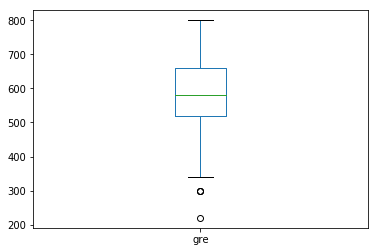

In [72]:
#boxplot 1
df_raw['gre'].plot(kind='box')

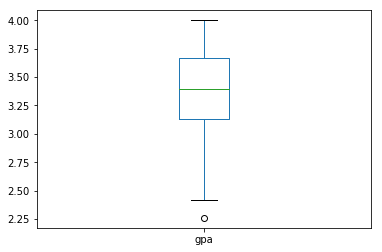

In [71]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: Mean of around 580 gre and 3.3 GPA; with some outliers below the min range.

#### Question 8. Describe each distribution 

In [65]:
# plot the distribution of each variable 
import statsmodels.formula.api as smf

lm = smf.ols(formula='admit ~ gpa + gre + prestige', data = df_raw).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 03 Apr 2018   Prob (F-statistic):           1.65e-08
Time:                        17:52:35   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462      -0.591       0.269
gpa            0.1462      0.064      2.296      0.022       0.021       0.271
gre            0.0004      0.000      2.063      0.040    2.05e-05       0.001
prestige      -0.1097      0.024     -4.606      0.000      -0.156      -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
df_raw.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [79]:
df_raw.kurt()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, because it seems that GPA and GRE are negatively skewed. Whereas Admit is positively skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, a potential solution would be to log the data. this is to stretch it out a little more to become more normalized.

#### Question 11. Which of our variables are potentially colinear? 

In [70]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA share a level of corrlation.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: GPA and GRE seems corrated, however, prestige does not seem to have a corrlation with GRE, GPA and admit.  

#### Question 14. What is your hypothesis? 

Answer: Admittance is based on GPA and GRE rather than prviding significate weight for prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data